# Data Structures Course 
Shiraz University Fall 2024    
Reza Rezazadegan   
[www.dreamintelligent.com](www.dreamintelligent.com) 

# 6- Binary Heaps

# Priority Queue revisited
Recall that a _priority queue_ was a type of queue in which each element has a _priority_ and when the `dequeue` function is called, the first-queued item with the highest priority is returned. (This means: we look which of the highest priority items was the first one that was queued and return it).  Such data structure has a lot of applications:

- router with limited bandwidth, must prioritize certain kinds of messages 
- process scheduling in operating system kernels 
- discrete-event simulation (when is next occurring event?) 
- graph algorithms (later in the course). 

A priority queue can be regarded as a type of Map or Set with `key=priority`. It is optimized for a particular set of Set operations:
- `build(X)`   
- `insert(x)`   
- `find_max()`   
- `delete_max()` same as `dequeue()`   

# Priority queue sort
Any implementation of the priority queue interface gives us a sorting algorithm: given a list of items or an iterable `X`, we can repeatedly `insert` its items into the priority queue and they get sorted in there! We can retrieve them by calling the `delete_max` or `delete_min` functions. 

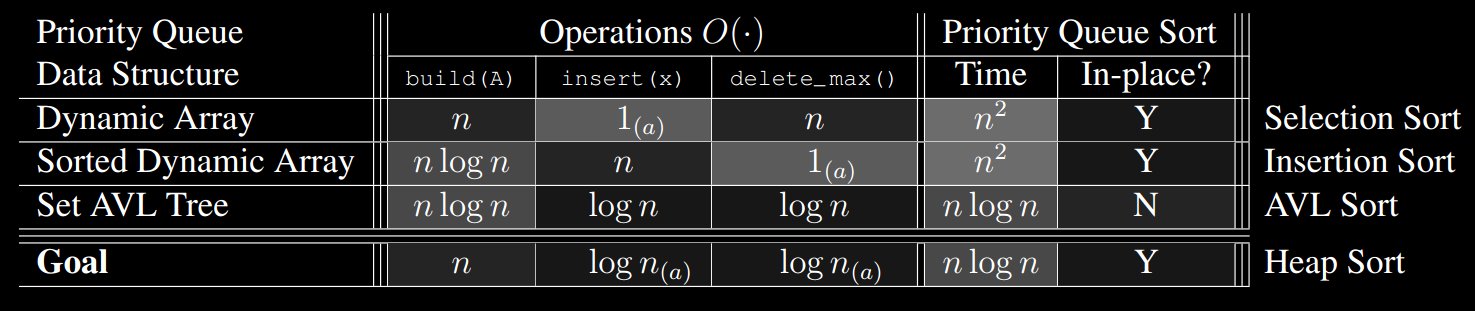



## Priority Queue as Unsorted Array
- Store elements in an unordered dynamic array 
- `insert(x)`: append `x` to the end of the array, in amortized O(1) time 
- `delete_max()`: find max in O(n), then delete it. (Requires shifting elements.) 
- `insert` is quick, but `delete_max` is slow. 
- The resulting sort algorithm is selection sort! (plus some copying) 


## Priority Queue as Sorted Array
- Store elements in a sorted dynamic array 
- `insert(x)`: append `x` to end of the array, swap down to sorted position in O(n) time .
- `delete_max()`: delete from end of the array in O(1) amortized time.
- `delete_max` is quick, but `insert` is slow. 
- The resulting sort algorithm is insertion sort! (plus some copying)  


Can we find a compromise between these two array priority queue extremes? 

## Priority Queue as AVL Tree
- AVL trees support `insert(x)`, `find_min()`, `find_max()`, `delete_min()`, and 
`delete_max()` in $O(\log n)$ time per operation. 
- So the resulting sort algorithm runs in $O(n \log n)$ time. It is called **AVL sort**. 
- Can speed up `find_min()` and `find_max()` to O(1) time via subtree augmentation. 


But this data structure is complicated and resulting sort is not in-place. Is there a simpler data structure for  priority queue, with in-place $O(n \log n)$ sort? 

Answer: **binary heap** and **heap sort**.  


## This chapter: Priority Queue as Complete Binary Tree
Remember that a _complete binary tree_ has $2^i$ nodes at depth i except at the largest depth, where all nodes are left-aligned.




# Binary Heaps

A heap is a complete binary tree in which the nodes are organized based on their
data entry values. 

- A **max-heap** has the property, known as the **max-heap  property**, that for each non-leaf node $v$ ,
the value in $v$ is greater than the value of its children. 

The largest value in a
max-heap will always be stored in the root while the smallest values will be stored
in the leaf nodes. 

- The min-heap has the opposite property. For each non-leaf
node V , the value in V is smaller than the value of its two children.

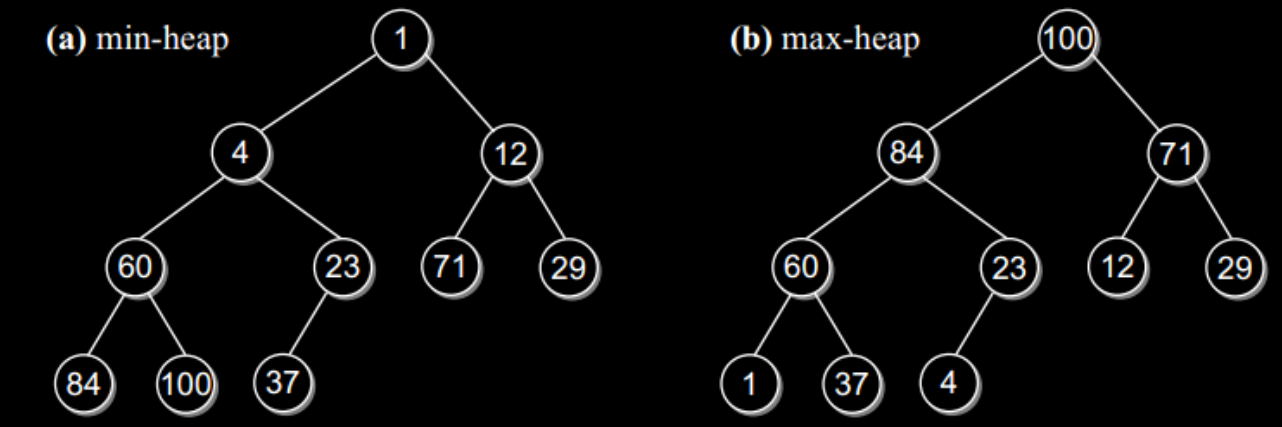

## Insertion into a heap
We insert a new value as the last leaf, then move it up as far as we can. $O(\log n)$
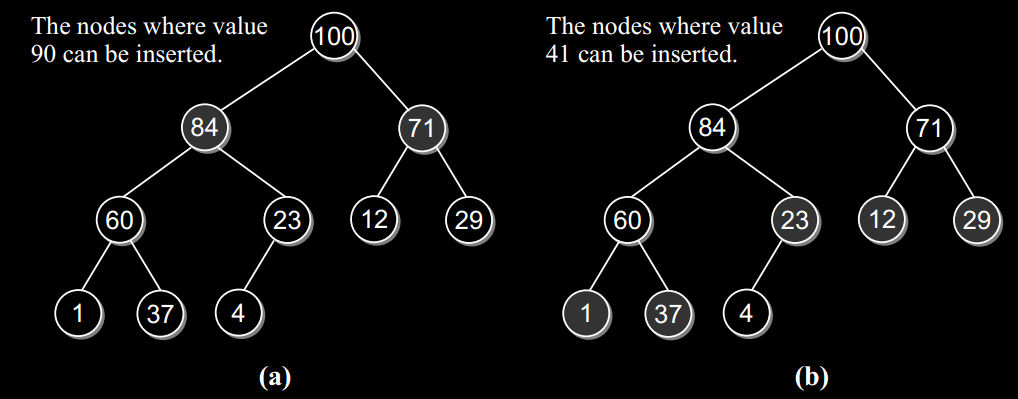
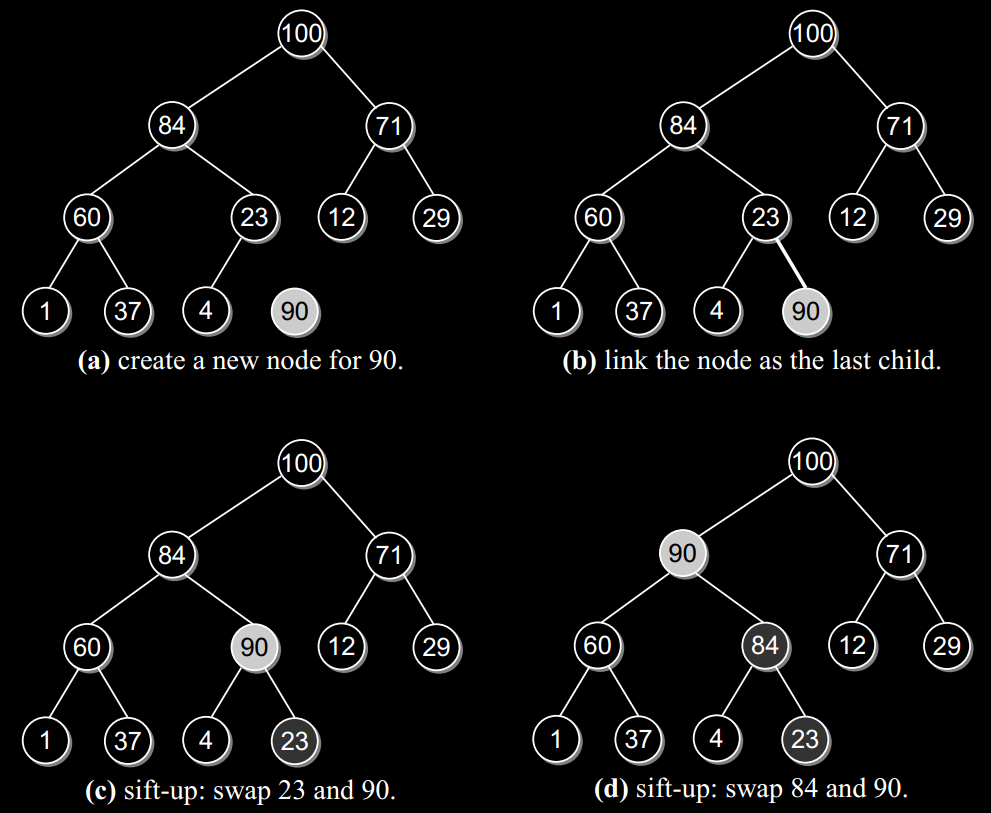
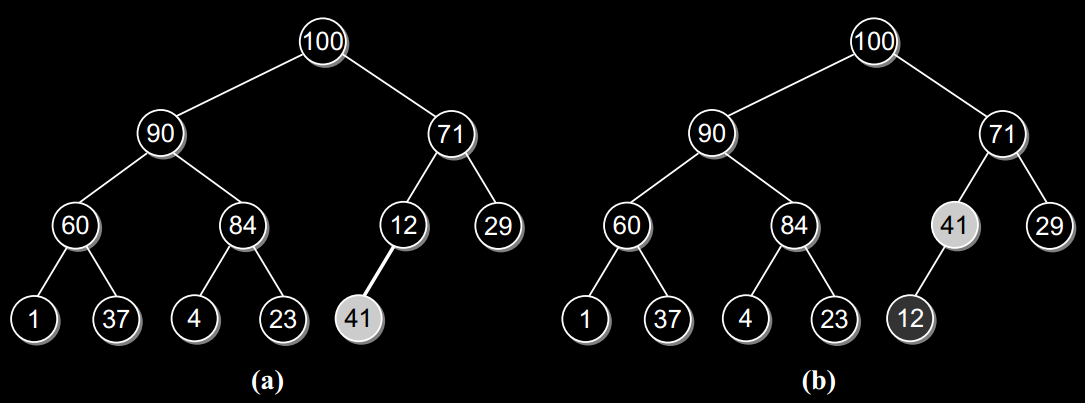


## Extractions (`delete_max`)
When a value is extracted and removed from the heap, it can only come from the
root node. Thus, in a max-heap, we always extract the largest value. 

After removing the value at the root, if the tree is not empty, we put the last leaf at the root then move it down as far as we can, till max-heap property is satisfied. $O(\log n)$

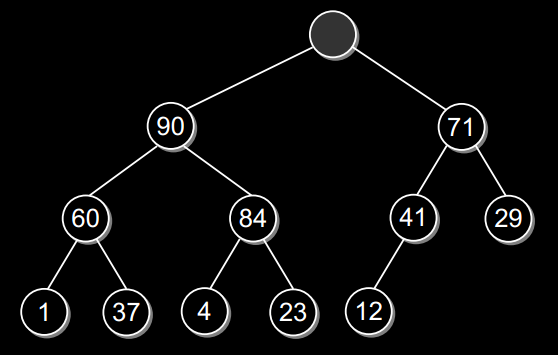

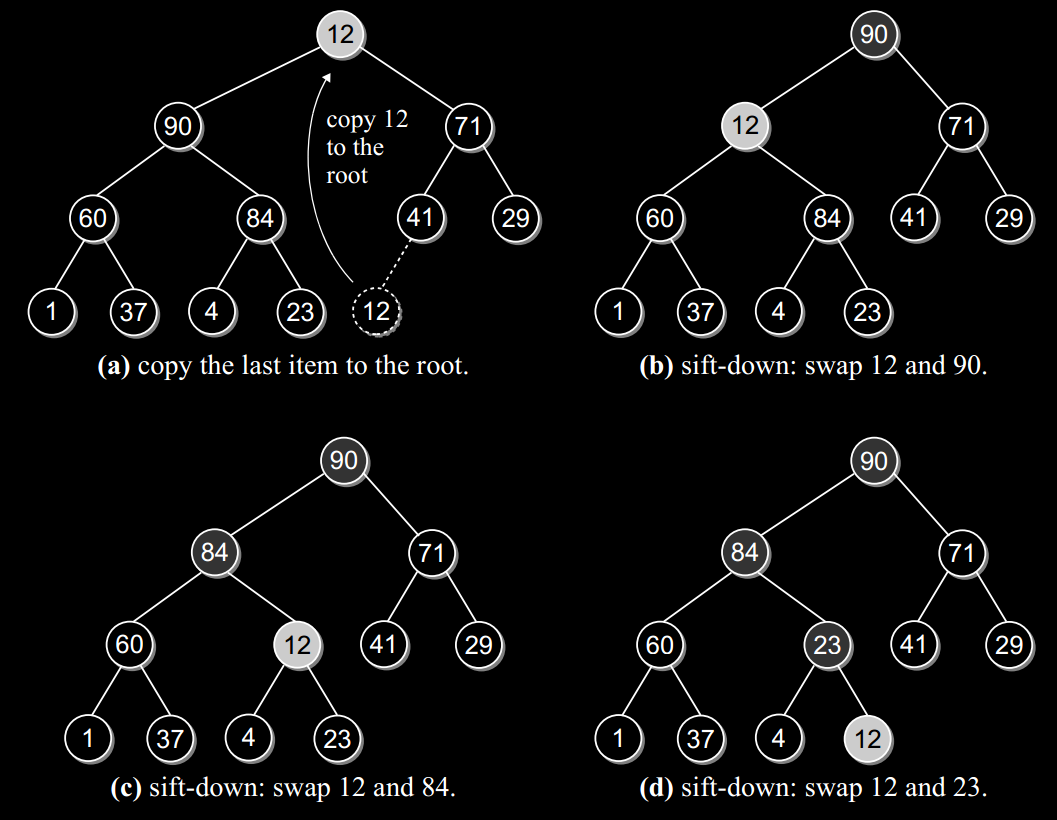

# Implementing the heap as an array

In a complete tree, there is a 1-1 correspondence between the nodes and the numbers $0, 1, 2, \ldots, n$:
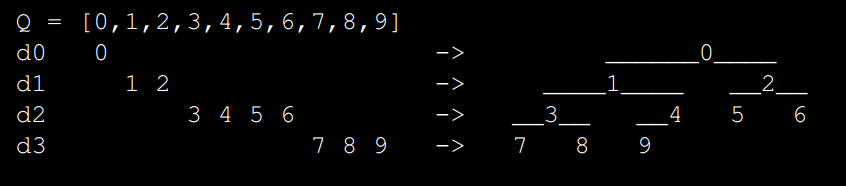
In other words, here we consider a different order than traversal order. Here the order of the nodes is from top to bottom and from left to right!

This way, we do not have to keep the tree structure! Because we have an explicit 1-1 correspondence between the nodes and integers, we can keep the nodes in an array:
- The root is at index 0 of the array.    
If a node is at index $i$ of the array, then 
- Its left child: $$left(i)=2i+1$$
- Its right child: $$right(i)=2i-2$$
- Its parent: $$parent(i)=[(i-1)/2]$$ where $[]$ denotes integer part. 



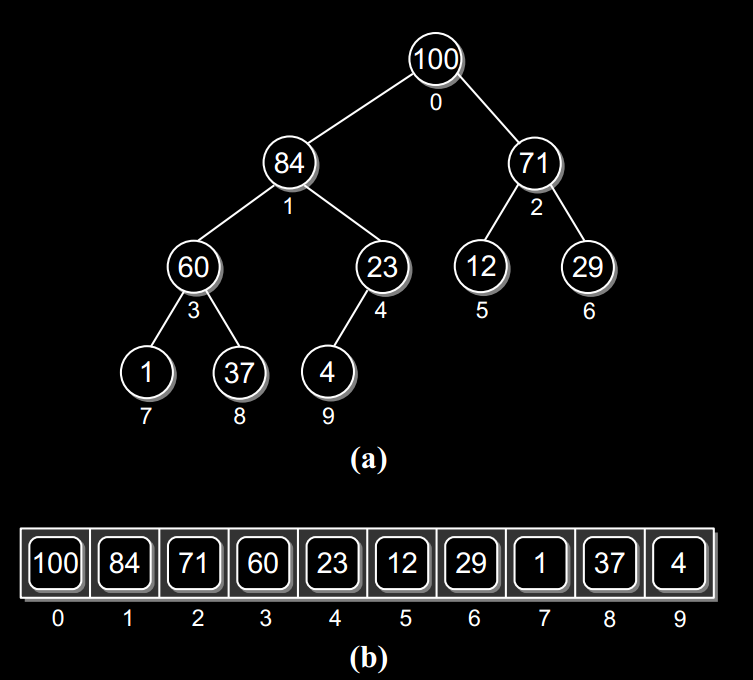


# Heap sort
If we have a list (or an iterable) of elements, we can `insert` them into a heap and then use `delete_max` to retrieve them.   
Since each of these two operations takes $O(\log n)$, the resulting **heap sort** takes $O(n \log n)$. 

We consider two improvements: 

## In-place sort
• Max-heap Q is a prefix of a larger array A, remember how many items |Q| belong to heap 
• |Q| is initially zero, eventually |A| (after inserts), then zero again (after deletes) 
• insert() absorbs next item in array at index |Q| into heap 
• delete max() moves max item to end, then abandons it by decrementing |Q|
• In-place priority queue sort with Array is exactly Selection Sort 
• In-place priority queue sort with Sorted Array is exactly Insertion Sort 
• In-place priority queue sort with binary Max Heap is Heap Sort
## Linear-time build
Idea! Treat full array as a complete binary tree from start, then max heapify down(i)
for i from n − 1 to 0 (leaves up): 
n−1 n−1 XX nn nn
worst-case swaps ≈ height(i) = (lg n−lg i) = lg = Θ lg √ = O(n) n! n(n/e)n
i=0 i=0
• So can build heap in O(n) time 
• (Doesn’t speed up O(n lg n) performance of heap sort) 


In [ ]:
# An array-based implementation of the max-heap.
from Array import Array
class MaxHeap :
    # Create a max-heap with maximum capacity of maxSize.
    def __init__( self, maxSize ):
        self._elements = Array( maxSize )
        self._count = 0 
    
    # Return the number of items in the heap.
    def __len__( self ):
        return self._count

    # Return the maximum capacity of the heap.
    def capacity( self ):
        return len( self._elements )

    # Add a new value to the heap.
    def add( self, value ):
        assert self._count < self.capacity(), "Cannot add to a full heap."
        # Add the new value to the end of the list.
        self._elements[ self._count ] = value
        self._count += 1
        # Sift the new value up the tree.
        self._siftUp( self._count - 1 )

    # Extract the maximum value from the heap.
    def extract( self ):
        assert self._count > 0, "Cannot extract from an empty heap."
        # Save the root value and copy the last heap value to the root.
        value = self._elements[0]
        self._count -= 1
        self._elements[0] = self._elements[ self._count ]
        # Sift the root value down the tree.
        self._siftDown( 0 )

        return value

    # Sift the value at the ndx element up the tree.
    def _siftUp( self, ndx ):
        if ndx > 0 :
            parent = (ndx-1) // 2
        else:
            return    
        if self._elements[ndx] > self._elements[parent] : # swap elements
            tmp = self._elements[ndx]
            self._elements[ndx] = self._elements[parent]
            self._elements[parent] = tmp
            self._siftUp( parent )

    # Sift the value at the ndx element down the tree.
    def _siftDown( self, ndx ):
        left = 2 * ndx + 1
        right = 2 * ndx + 2
        # Determine which node contains the larger value.
        largest = ndx
        if left < count and self._elements[left] >= self._elements[largest] :
            largest = left
        elif right < count and self._elements[right] >= self._elements[largest]:
            largest = right
        # If the largest value is not in the current node (ndx), swap it with
        # the largest value and repeat the process.
        if largest != ndx :
            swap( self._elements[ndx], self._elements[largest] )
            _siftDown( largest )


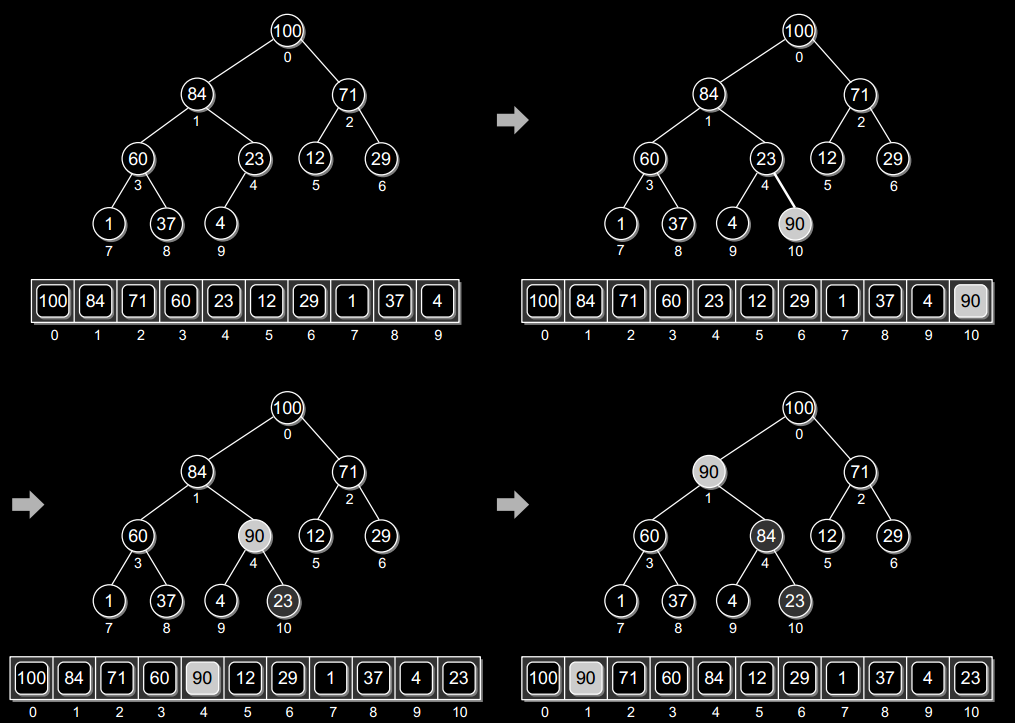

## Efficiency analysis

Inserting an item into a heap implemented as an array requires O(log n) time in
the worst case. 

Extracting an item from a heap implemented as an array also requires O(log n)
time in the worst case.

# Priority queue implemented by a min-heap

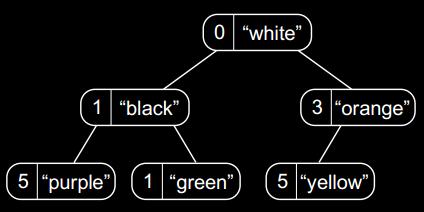

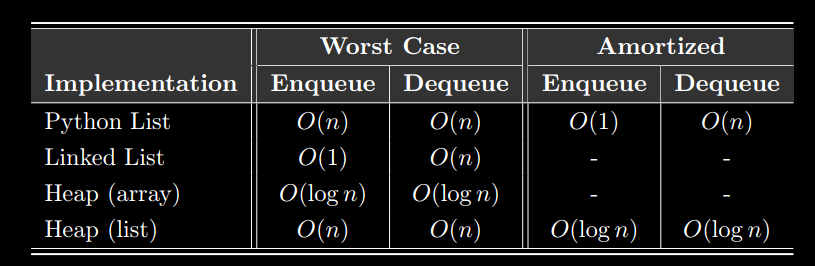

# Application: Morse code

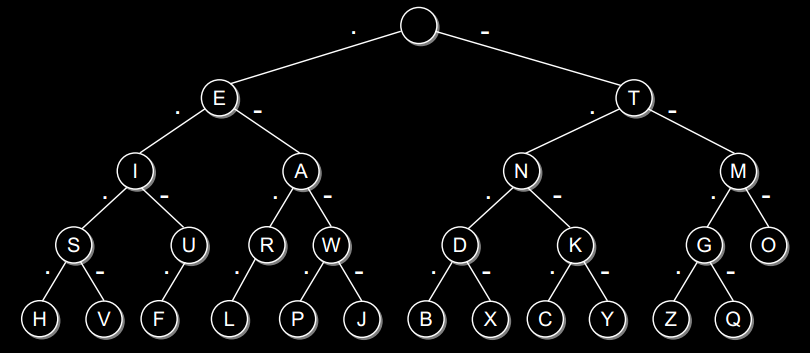

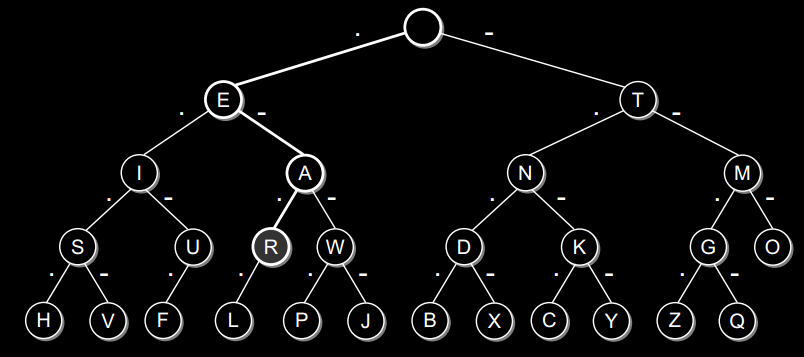

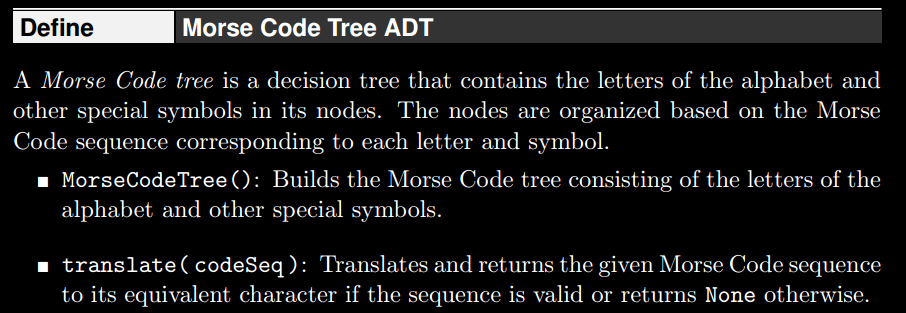
